In [1]:
from qiskit import IBMQ

IBMQ.load_account() # Load account from disk

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [2]:
IBMQ.providers()

provider = IBMQ.get_provider('ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [8]:
import qiskit.tools.jupyter

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
    print(f"name: {backend.name()} qubits = {qubit_count} job = {backend.status().pending_jobs}")

name: ibmq_qasm_simulator qubits = simulated job = 7
name: ibmq_armonk qubits = 1 job = 7
name: ibmq_santiago qubits = 5 job = 2021
name: ibmq_bogota qubits = 5 job = 6
name: ibmq_lima qubits = 5 job = 7
name: ibmq_belem qubits = 5 job = 1
name: ibmq_quito qubits = 5 job = 6
name: simulator_statevector qubits = simulated job = 7
name: simulator_mps qubits = simulated job = 7
name: simulator_extended_stabilizer qubits = simulated job = 6
name: simulator_stabilizer qubits = simulated job = 6
name: ibmq_manila qubits = 5 job = 33


AND gate


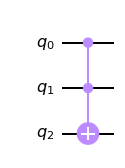


Transpiled AND gate with the required conectivity


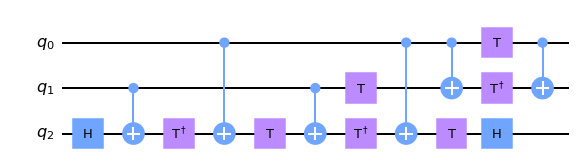

In [11]:
from qiskit import *

qc_and = QuantumCircuit(3)
qc_and.ccx(0,1,2)
print('AND gate')
display(qc_and.draw('mpl'))
print('\nTranspiled AND gate with the required conectivity')
qc_and.decompose().draw('mpl')

In [12]:
from qiskit.tools.monitor import job_monitor

# run the cell to define AND gate for real quantum system
def AND(inp1, inp2, backend, layout):
    
    qc = QuantumCircuit(3,1)
    qc.reset(range(3))
    
    if inp1 == '1':
        qc.x(0)
    if inp2 == '1':
        qc.x(1)
        
    qc.barrier()
    qc.ccx(0,1,2)
    qc.barrier()
    qc.measure(2,0)
    
    qc_trans = transpile(qc, backend, initial_layout = layout, optimization_level = 3)
    job = execute(qc_trans, backend, shots=1000)
    print(job.job_id())
    job_monitor(job)
    
    output = job.result().get_counts()
    
    return qc_trans, output